In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.colors as colors
from scripts.conversion import *

In [7]:
cd ..

/home/rd804/discriminator-metric


In [126]:
tests =[ {'exp_name': 'trial_1_ln_jetnet30',
          'best_epoch': 0,
          'type': 'lorentznet'},
           {'exp_name': 'trial_1_pn_jetnet30',
          'best_epoch': 'best_model_score',
          'type': 'particlenet'},
           {'exp_name': 'trial_1_remove_tail_PN',
          'best_epoch': 'best_model_score',
          'type': 'particlenet'},
           {'exp_name': 'test_cartesian_1',
            'best_epoch': 3,
          'type': 'lorentznet'} ,
          {'exp_name': 'test_3_cartesian_particlenet',
           'best_epoch': 'best_model_score',
           'type': 'particlenet'}]


In [8]:

label = pd.read_hdf('data/jetnet30_data.h5', 'labels_valid')['labels'].values
print(label.shape)



(100000,)


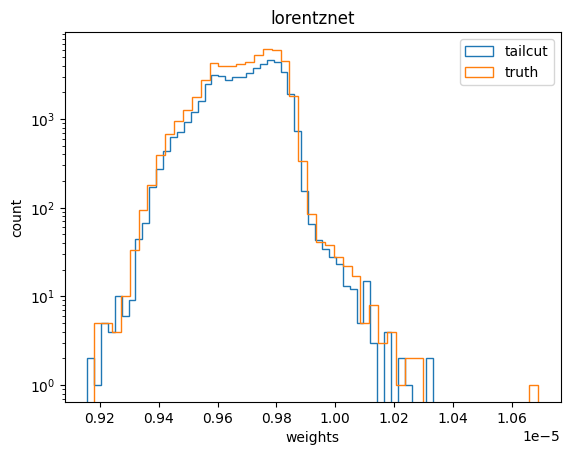

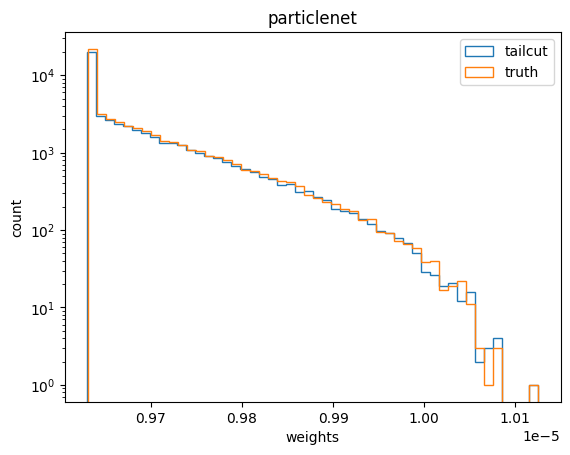

IndexError: boolean index did not match indexed array along dimension 0; dimension is 52158 but corresponding boolean dimension is 103176

In [71]:
for test in tests:
    exp_name = test['exp_name']
    best_epoch = test['best_epoch']
    if test['type']=='lorentznet':
        score = np.load(f'output/{exp_name}/score_{best_epoch}.npy')[:,2]
    elif test['type']=='particlenet':
        score = np.load(f'output/{exp_name}/best_model_score.npy')[:,1]

    weights = score/(1-score)
    weights = weights/np.sum(weights)
    plt.hist(weights[label==0], bins=50,histtype='step', label='tailcut')
    plt.hist(weights[label==1], bins=50,histtype='step', label='truth')
    plt.legend()
    plt.xlabel('weights')
    plt.ylabel('count')
    plt.yscale('log')
    plt.title(test['type'])
    plt.show()


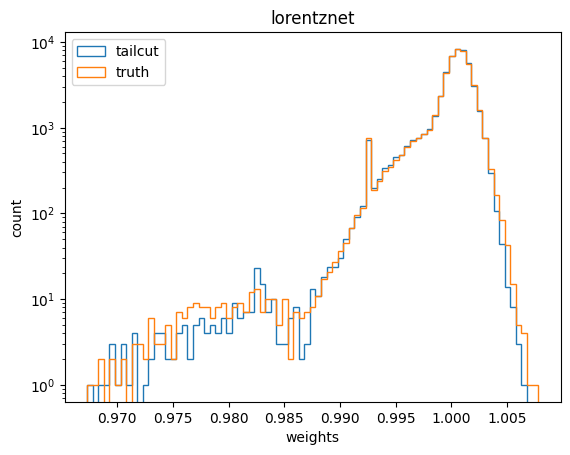

In [129]:
test_1 = [tests[-2],tests[-1]]

for test in test_1:
    exp_name = test['exp_name']
    best_epoch = test['best_epoch']
    if test['type']=='lorentznet':
        score = np.load(f'output/{exp_name}/score_{best_epoch}.npy')
        weights = score[:,2]/(1-score[:,2])
        plt.hist(weights[label==0], 
                 bins=np.arange(min(weights), max(weights),0.0005),
                 histtype='step', label='tailcut')
        plt.hist(weights[label==1], 
                 bins=np.arange(min(weights), max(weights),0.0005),
                 histtype='step', label='truth')
      #  print(np.sum(label-score[:-2,0]))

    elif test['type']=='particlenet':
        continue
       # score = np.load(f'output/{exp_name}/best_model_score.npy')[:,0]
       # weights = score/(1-score)
       # plt.hist(weights[label==0], bins=np.arange(min(weights), max(weights),0.001),
       #          histtype='step', label='tailcut')
       # plt.hist(weights[label==1], bins=np.arange(min(weights), max(weights),0.001),
        #         histtype='step', label='truth')

        



    plt.xlabel('weights')
    plt.ylabel('count')
    plt.yscale('log')
    if test['type']=='lorentznet':
        plt.legend(loc='upper left')
    else:
        plt.legend()
    #plt.xscale('log')
    #plt.xlim(0.,1.4)
    plt.title(test['type'])
    plt.show()

/tmp/ipykernel_3932127/735842317.py:20: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1/fpr, label=f'{test["type"]} AUC={auc:.3f}')
/tmp/ipykernel_3932127/735842317.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1/fpr, label=f'{test["type"]} AUC={auc:.3f}')
/tmp/ipykernel_3932127/735842317.py:25: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1/tpr, label='random',linestyle='--',color='black')


100000


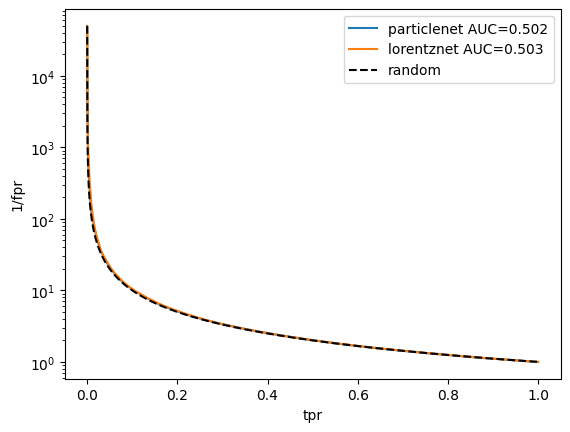

In [128]:
test_1 = [tests[-1],tests[-2]]


for test in test_1:
    exp_name = test['exp_name']
    best_epoch = test['best_epoch']
    if test['type']=='lorentznet':
        score = np.load(f'output/{exp_name}/score_{best_epoch}.npy')[:,2]
        print(len(score))
        #_label = np.load(f'output/{exp_name}/score_{best_epoch}.npy')[:,0]

        auc = roc_auc_score(label, score)
        fpr, tpr, _ = roc_curve(label, score)
        plt.plot(tpr, 1/fpr, label=f'{test["type"]} AUC={auc:.3f}')

    elif test['type']=='particlenet':
        score = np.load(f'output/{exp_name}/best_model_score.npy')[:,0]
        auc = roc_auc_score(label, score)
        fpr, tpr, _ = roc_curve(label, score)
        plt.plot(tpr, 1/fpr, label=f'{test["type"]} AUC={auc:.3f}')

        


plt.plot(tpr,1/tpr, label='random',linestyle='--',color='black')
plt.xlabel('tpr')
plt.ylabel('1/fpr')
plt.yscale('log')
plt.legend(loc='upper right')
#plt.xscale('log')
#plt.xlim(0.1,10)
#plt.title(test['type'])
plt.show()

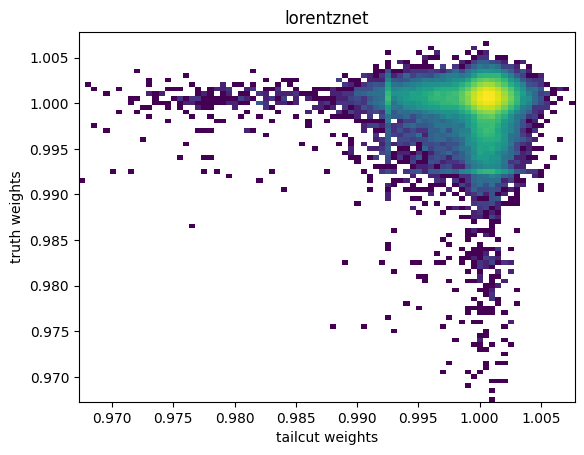

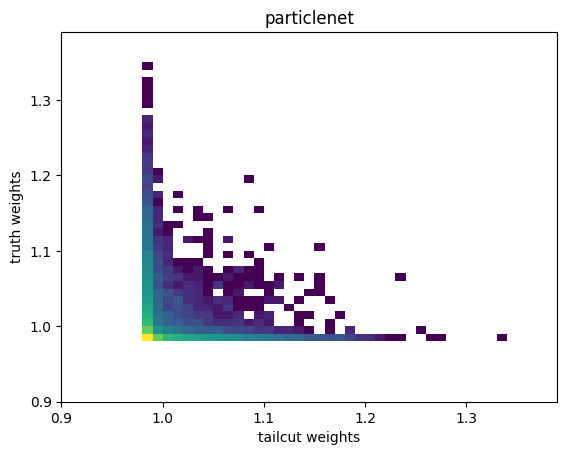

In [141]:
test_1 = [tests[-2],tests[-1]]

for test in test_1:
    exp_name = test['exp_name']
    best_epoch = test['best_epoch']
    if test['type']=='lorentznet':
        score = np.load(f'output/{exp_name}/score_{best_epoch}.npy')
        weights = score[:,2]/(1-score[:,2])
      #  print(len(weights[label==1]))
      #  print(len(weights[label==0]))
        bins = np.arange(min(weights), max(weights),0.0005)
        plt.hist2d(weights[label==1], weights[label==0],
                 bins=[bins,bins], norm = colors.LogNorm())
        
    elif test['type']=='particlenet':
        score = np.load(f'output/{exp_name}/best_model_score.npy')[:,0]
        weights = score/(1-score)
        bins = np.arange(0.9, 1.4,0.01)

        plt.hist2d(weights[label==0],weights[label==1], 
                   bins=[bins,bins], norm = colors.LogNorm())


        



    plt.xlabel('tailcut weights')
    plt.ylabel('truth weights')
    #plt.yscale('log')
    #if test['type']=='lorentznet':
    #    plt.legend(loc='upper left')
   # else:
    #    plt.legend()
    #plt.xscale('log')
    #plt.xlim(0.,1.4)
    plt.title(test['type'])
    plt.show()

100000


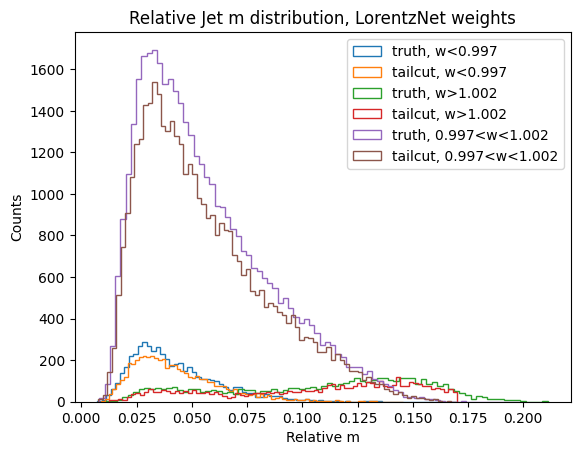

In [173]:
s = 'valid'
exp_name = 'test_cartesian_1'
best_epoch = 3

data = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{s}').values.reshape(-1,30,4)
labels = pd.read_hdf('data/jetnet30_data.h5', f'labels_{s}')['labels'].values
score = np.load(f'output/{exp_name}/score_{best_epoch}.npy')
weights = score[:,2]/(1-score[:,2])
print(len(score))

#labels = f[f'labels_{s}']
#pt = pt_jets(data)
m = mjj_jets(data)
#assert len(data) == len(labels)
density = False
figure = plt.figure()
plt.hist(m[(labels==1) & (weights < 0.997) ], bins=80, 
                histtype='step', label='truth, w<0.997',density=density)
plt.hist(m[(labels==0) & (weights < 0.997) ], bins=80, 
                histtype='step', label='tailcut, w<0.997',density=density)
plt.hist(m[(labels==1) & (weights > 1.002) ], bins=80, 
                histtype='step', label='truth, w>1.002',density=density)
plt.hist(m[(labels==0) & (weights > 1.002) ], bins=80, 
                histtype='step', label='tailcut, w>1.002',density=density)
plt.hist(m[(labels==1) & (weights < 1.002) & (weights > 0.997) ], bins=80, 
                histtype='step', label='truth, 0.997<w<1.002',density=density)

plt.hist(m[(labels==0) & (weights < 1.002) & (weights > 0.997) ], bins=80, 
                histtype='step', label='tailcut, 0.997<w<1.002',density=density)


#plt.hist(m[(labels==1) & (weights < 0.997) ], bins=100, 
 #               histtype='step', label='label 1, w<0.997',density=True)
#plt.hist(m[labels==1], bins=100, 
 #               histtype='step', label='label 1', density=True)
plt.legend()
plt.xlabel('Relative m')
if density:
    plt.ylabel('Normalized counts')
else:
    plt.ylabel('Counts')
plt.title(f'Relative Jet m distribution, LorentzNet weights')
plt.show()

